### CSV test

In [1]:
import pandas as pd
bird_results = pd.read_csv('logs_merged.csv')
bird_results.head(10)


,Unnamed: 0,question,gold_query,db_id,final_query,schema_linking,classification,sql_generation,self_correction
0,0,What is the highest eligible free rate for K-1...,SELECT `FRPM Count (K-12)` / `Enrollment (K-12...,california_schools,"SELECT frpm.""FRPM Count (K-12)"" / frpm.""Enroll...","""highest eligible free rate"" so we need column...",The SQL query for the given question needs the...,"For creating the SQL for the given question, w...","1) The column `MAX(frpm.""FRPM Count (K-12)"") /..."
1,1,Please list the lowest three eligible free rat...,SELECT `Free Meal Count (Ages 5-17)` / `Enroll...,california_schools,"SELECT frpm.""Free Meal Count (Ages 5-17)"" / fr...","""lowest three eligible free rates"" so we need ...",The SQL query for the given question needs the...,"For creating the SQL for the given question, w...","1) The column ""School Name"" is not mentioned i..."
2,2,Please list the zip code of all the charter sc...,SELECT T2.Zip FROM frpm AS T1 INNER JOIN schoo...,california_schools,SELECT schools.Zip FROM schools INNER JOIN frp...,"""zip code"" so we need column = [schools.Zip]\n...",The SQL query for the given question needs the...,"For creating the SQL for the given question, w...",1) The column schools.Zip is not mentioned in ...
3,0,"Give the number of ""Revival"" badges.",SELECT COUNT(Id) FROM badges WHERE Name = 'Rev...,codebase_community,SELECT COUNT(*) FROM badges WHERE Name = 'Revi...,"""number"" so we need column = [badges.Id]\n""Rev...",The SQL query for the given question needs the...,SELECT COUNT(*) FROM badges WHERE Name = 'Revi...,1) The SELECT clause is missing the COUNT() fu...
4,1,What is the title for the post which got the h...,SELECT Title FROM posts WHERE Id = ( SELECT Po...,codebase_community,SELECT posts.Title FROM posts INNER JOIN comme...,"""the title for the post"" so we need column = [...",The SQL query for the given question needs the...,"For creating the SQL for the given question, w...",1) The column posts.Title is mentioned in the ...
5,2,"For the post which got 1910 view counts, how m...",SELECT COUNT(T1.Id) FROM posts AS T1 INNER JOI...,codebase_community,SELECT COUNT(*) FROM posts INNER JOIN comments...,"""post"" so we need column = [posts.Id]\n""view c...",The SQL query for the given question needs the...,"For creating the SQL for the given question, w...",1) The column comments.Id is not mentioned in ...
6,3,User No.3025 gave a comment at 20:29:39 on 201...,SELECT T1.FavoriteCount FROM posts AS T1 INNER...,codebase_community,SELECT T3.FavoriteCount FROM users AS T1 INNER...,"""User No.3025"" so we need column = [users.Id]\...",The SQL query for the given question needs the...,"For creating the SQL for the given question, w...",1) The column T3.FavoriteCount is not mentione...
7,4,Give the only one comment text of the post wit...,SELECT T2.Text FROM posts AS T1 INNER JOIN com...,codebase_community,SELECT comments.Text FROM comments INNER JOIN ...,"""comment text"" so we need column = [comments.T...",The SQL query for the given question needs the...,"For creating the SQL for the given question, w...",1) The column CommentCount is not present in t...
8,5,User No.23853 gave a comment to a post at 9:08...,"SELECT IIF(T2.ClosedDate IS NULL, 'NOT well-fi...",codebase_community,SELECT CASE WHEN T3.ClosedDate IS NULL THEN 'N...,"""User No.23853"" so we need column = [users.Id]...",The SQL query for the given question needs the...,"For creating the SQL for the given question, w...",1) The column T3.ClosedDate is not mentioned i...
9,6,"For the owner user of post No. 65041, what is ...",SELECT T1.Reputation FROM users AS T1 INNER JO...,codebase_community,SELECT users.Reputation FROM posts INNER JOIN ...,"""owner user"" so we need column = [posts.OwnerU...",The SQL query for the given question needs the...,"For creating the SQL for the given question, w...",1) The column users.Reputation is not mentione...


In [2]:
bird_results.size

12726

### Plots

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### First Iteration

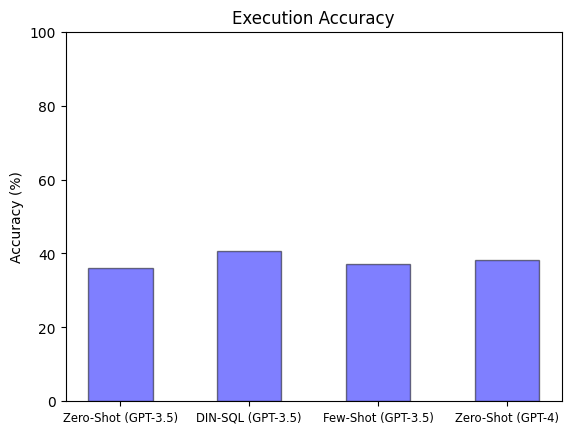

In [84]:
data ={
    'Name': ['Zero-Shot (GPT-3.5)', 'DIN-SQL (GPT-3.5)', 'Few-Shot (GPT-3.5)',"Zero-Shot (GPT-4)"],
    'Iteration 1': [36.19, 40.57, 37.14, 38.09 ],
}
df = pd.DataFrame(data)
# Set the width of the bars
barWidth = 0.5


# Set position of bar on X axis
r1 = np.arange(len(df['Iteration 1']))
r2 = [x + barWidth + barWidth/2 for x in r1]

# Make the plot
plt.bar(r1, df['Iteration 1'], 
        alpha=0.5, 
        color='blue', 
        width=barWidth, 
        edgecolor='black', 
        label='Iteration 1')

# Add xticks on the middle of the group bars
plt.xticks([r for r in range(len(df['Iteration 1']))], df['Name'], fontsize='small')
plt.ylim([0, 100] )
#y-axis
plt.ylabel('Accuracy (%)')
# Create legend & Show graphic
# Alternative Title: "Comparative Execution Accuracy of Text-to-SQL Models on BIRD-bench Financial Domain"
plt.title('Execution Accuracy')
plt.show()

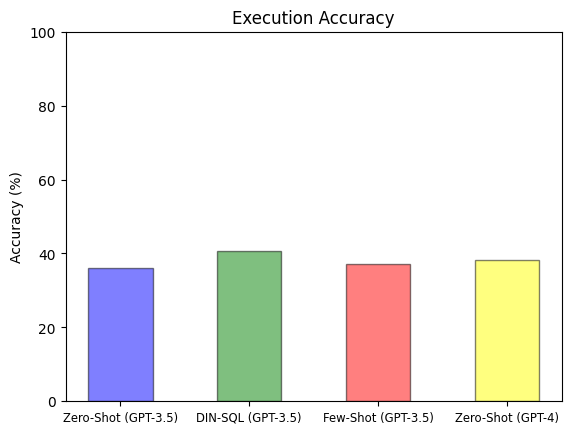

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
data = {
    'Name': ['Zero-Shot (GPT-3.5)', 'DIN-SQL (GPT-3.5)', 'Few-Shot (GPT-3.5)',"Zero-Shot (GPT-4)"],
    'Iteration 1': [36.19, 40.57, 37.14, 38.09],
}
df = pd.DataFrame(data)

# Set the width of the bars
barWidth = 0.5

# Set position of bar on X axis
r1 = np.arange(len(df['Iteration 1']))

# Colors for each bar
colors = ['blue', 'green', 'red', 'yellow']

# Make the plot with individual colors
for i in range(len(r1)):
    plt.bar(r1[i], df['Iteration 1'][i], color=colors[i], alpha=0.5, width=barWidth, edgecolor='black')

# Add xticks on the middle of the group bars
plt.xticks([r for r in range(len(df['Iteration 1']))], df['Name'], fontsize='small')
plt.ylim([0, 100])

# y-axis
plt.ylabel('Accuracy (%)')

# Title
plt.title('Execution Accuracy')

# Show the plot
plt.show()


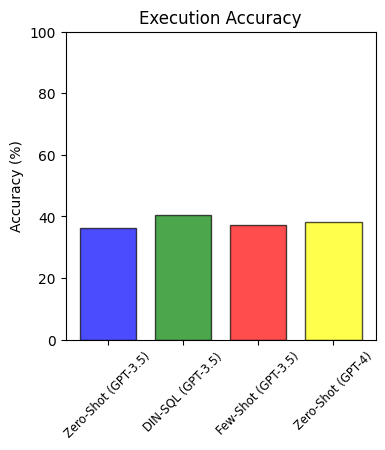

In [108]:
# Reducing the width of the plot
plt.figure(figsize=(4, 4))  # Reduced width from 10 to 8 inches

barWidth = 0.75

for i in range(len(r1)):
    plt.bar(r1[i], df['Iteration 1'][i], color=colors[i], alpha=0.7, width=barWidth, edgecolor='black')

# Add xticks on the middle of the group bars
plt.xticks(r1, df['Name'], fontsize='small', rotation=45)
plt.ylim([0, 100])

# y-axis
plt.ylabel('Accuracy (%)')

# Title
plt.title('Execution Accuracy')

# Show the plot
plt.show()


#### Second Iteration

[0, 1, 2, 3]


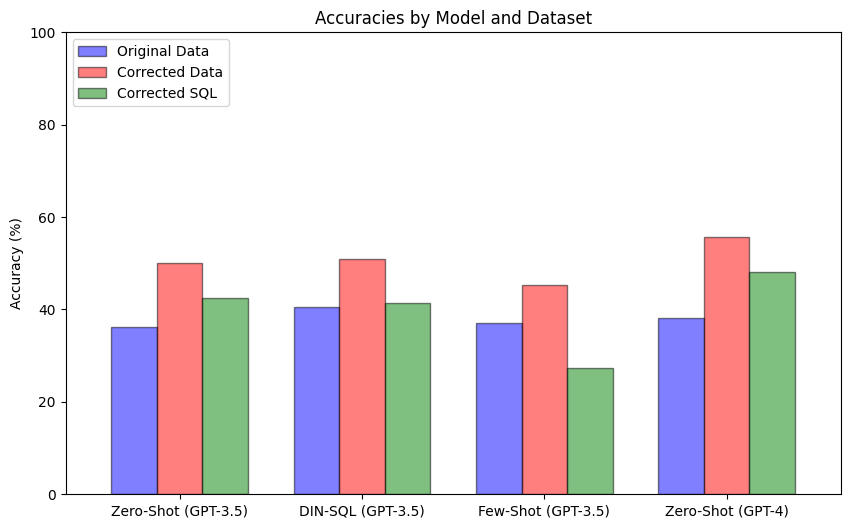

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating DataFrame from the provided data
data2 = {
    'Name': ['Zero-Shot (GPT-3.5)','DIN-SQL (GPT-3.5)', 'Few-Shot (GPT-3.5)', "Zero-Shot (GPT-4)"],
    'Original Data': [36.19,  40.57, 37.14, 38.09],
    'Corrected Data': [50, 50.94, 45.28, 55.66],
    'Corrected SQL': [42.45, 41.51, 27.358, 48.11]
}

df = pd.DataFrame(data2)

# Setting the positions and width for the bars
pos = list(range(len(df['Original Data']))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,6))
print(pos)
# Create a bar with Original data,
plt.bar([p + .125 for p in pos], 
        df['Original Data'], 
        width, 
        alpha=0.5, 
        color='blue', 
        label=df['Name'][0],
        edgecolor='black',) 

# Create a bar with Corrected data,
plt.bar([p + width + .125 for p in pos], 
        df['Corrected Data'],
        width, 
        alpha=0.5, 
        color='red', 
        label=df['Name'][1],
        edgecolor='black',) 

# Create a bar with Corrected SQL data,
plt.bar([p + width*2+.125 for p in pos], 
        df['Corrected SQL'],
        width, 
        alpha=0.5, 
        color='green', 
        label=df['Name'][2],
        edgecolor='black',) 

# Set the y axis label
ax.set_ylabel('Accuracy (%)')

# Set the chart's title
ax.set_title('Accuracies by Model and Dataset')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['Name'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 100] )

# Adding the legend and showing the plot
plt.legend(['Original Data', 'Corrected Data', 'Corrected SQL'], loc='upper left')
# plt.grid()
plt.show()

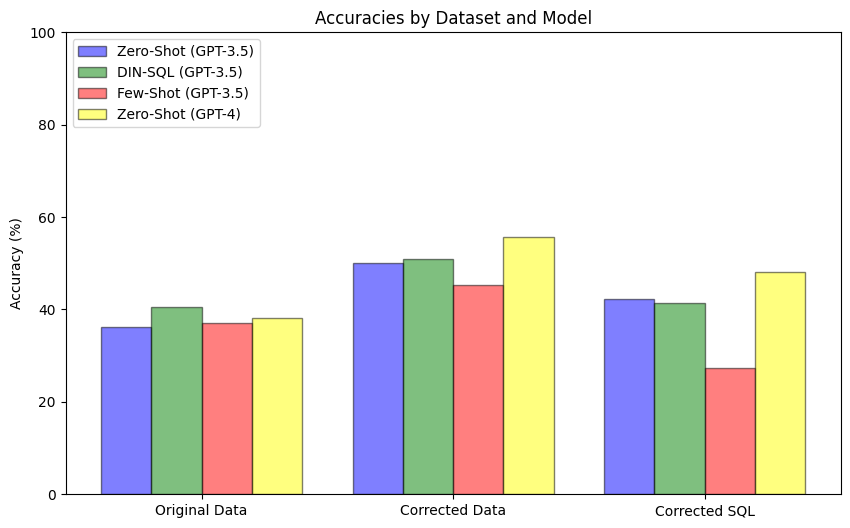

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Original, Corrected, Corrected SQL

# Rearranging the data to suit the new plot structure
data_rearranged = {    
    'Zero-Shot (GPT-3.5)': [36.19, 50, 42.25],
    'DIN-SQL (GPT-3.5)': [40.57, 50.94, 41.51],
    'Few-Shot (GPT-3.5)': [37.14, 45.28, 27.358],
    'Zero-Shot (GPT-4)': [38.09, 55.66, 48.11]
}

df_rearranged = pd.DataFrame(data_rearranged, index=['Original Data', 'Corrected Data', 'Corrected SQL'])

# Plotting the new bar plot with specified colors
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'yellow']  # Specified colors

# Set the positions for the groups and the width of each bar
positions = range(len(df_rearranged))
bar_width = 0.2

# Creating bars for each model with the specified colors
for i, (model, color) in enumerate(zip(df_rearranged.columns, colors)):
    plt.bar([p + bar_width*i for p in positions], 
            df_rearranged[model], 
            bar_width, 
            label=model,
            color=color,
            alpha=0.5,
            edgecolor="black")

# Set the y axis label
ax.set_ylabel('Accuracy (%)')

# Set the chart's title
ax.set_title('Accuracies by Dataset and Model')

# Set the position of the x ticks
ax.set_xticks([p + bar_width*1.5 for p in positions])

# Set the labels for the x ticks
ax.set_xticklabels(df_rearranged.index)

plt.ylim([0, 100] )

# Adding the legend and showing the plot
plt.legend(loc='upper left')
plt.show()

/var/folders/z4/j43wf7kj14q5wqsm6h033r9m0000gp/T/ipykernel_96134/1885062667.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(df_rearranged.columns, rotation=45, ha="right")
/var/folders/z4/j43wf7kj14q5wqsm6h033r9m0000gp/T/ipykernel_96134/1885062667.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(df_rearranged.columns, rotation=45, ha="right")
/var/folders/z4/j43wf7kj14q5wqsm6h033r9m0000gp/T/ipykernel_96134/1885062667.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(df_rearranged.columns, rotation=45, ha="right")


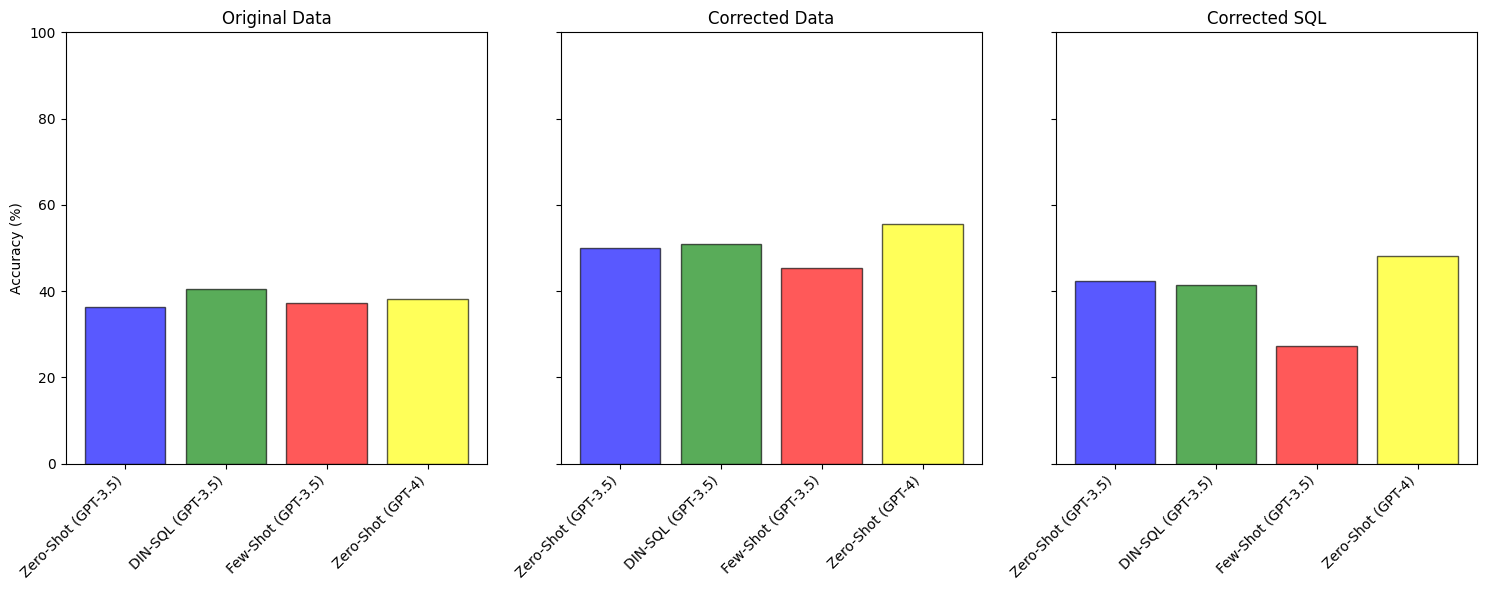

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

# Rearranging the data to suit the new plot structure
data_rearranged = {    
    'Zero-Shot (GPT-3.5)': [36.19, 50, 42.25],
    'DIN-SQL (GPT-3.5)': [40.57, 50.94, 41.51],
    'Few-Shot (GPT-3.5)': [37.14, 45.28, 27.358],
    'Zero-Shot (GPT-4)': [38.09, 55.66, 48.11]
}

df_rearranged = pd.DataFrame(data_rearranged, index=['Original Data', 'Corrected Data', 'Corrected SQL'])

# Colors for the plots
colors = ['blue', 'green', 'red', 'yellow']

# Creating three separate plots
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

# Plot each dataset in a separate subplot
for i, dataset in enumerate(df_rearranged.index):
    axs[i].bar(df_rearranged.columns, df_rearranged.loc[dataset], color=colors, alpha=0.65, edgecolor="black")
    axs[i].set_title(dataset)
    axs[i].set_xticklabels(df_rearranged.columns, rotation=45, ha="right")
    axs[i].set_ylim([0, 100])
    axs[i].set_ylabel('Accuracy (%)' if i == 0 else "")

plt.tight_layout()
plt.show()

In [1]:
import sqlite3
import os
from collections import Counter

class DatabaseInterface():

    DEV_DB_PATH = os.path.abspath(
      os.path.join(os.getcwd(), '..', 'data/BIRD/dev/dev_databases/'))
   
    TRAIN_DB_PATH = os.path.abspath(
      os.path.join(os.getcwd(), '..', 'data/BIRD/train/train_databases/'))

    def __init__(self):
      self.conn = None
      self.cursor = None
      self.data = []

      self.current_db = ""
      self.current_database_schema = ""

      self.load_database_names()


    def execute_queries_and_match_data(self, sql: str, gold_sql: str, db_name: str) -> int:
        """
        Execute provided SQL queries and compare the results.

        Parameters:
            sql (str): The predicted SQL query to execute.
            gold_sql (str): The golden SQL query to compare results.
            db_name (str): The database name on which the queries will be executed.

        Returns:
            int: 1 if the results match, otherwise 0.
        """

        if self.current_db != db_name:
            self.load_db(db_name)
        
        try:            
            self.cursor.execute(sql)
            pred_res = self.cursor.fetchall()                
        except sqlite3.Error as err:            
            return 0

        try:
          self.cursor.execute(gold_sql)
          golden_res = self.cursor.fetchall()
        except sqlite3.Error as err:            
          return 0

        equal = (Counter(pred_res) == Counter(golden_res))
        return int(equal)
    
    def load_db(self, db_name: str) -> None:
      """
      Load a database into the class by connecting and setting a cursor.

      Parameters:
         db_name (str): The name of the database to load.
      """
      db_path = ""
      if db_name in self.dev_databases:
         db_path = f"{self.DEV_DB_PATH}/{db_name}/{db_name}.sqlite"
      else:
         db_path = f"{self.TRAIN_DB_PATH}/{db_name}/{db_name}.sqlite"
         
      self.conn = sqlite3.connect(db_path)      
      self.cursor = self.conn.cursor()
      self.current_db = db_name

    
    def load_database_names(self):
      self.dev_databases = os.listdir(self.DEV_DB_PATH)
      self.train_databases = os.listdir(self.TRAIN_DB_PATH)
   

In [28]:
import pandas as pd


df = pd.read_csv('logs_merged.csv')

total_successes = 0
total_successes_per_domain = {}
total_questions_per_domain = {}
difficulties_per_domain = {}

for index, row in df.iterrows():
    
    gold_query = row['gold_query']
    predicted_query = row['final_query']
    db_id = row['db_id']
    

    success = db.execute_queries_and_match_data(predicted_query, gold_query, db_id)
    total_successes += success

    if not db_id in total_successes_per_domain:
        total_successes_per_domain[db_id] = success
    else:
        total_successes_per_domain[db_id] += success

    if not db_id in total_questions_per_domain:
        total_questions_per_domain[db_id] = 1
    else:
        total_questions_per_domain[db_id] += 1

    if index % 100 == 0:
        print("At row: " + str(index) + " Total successes: " + str(total_successes))



At row: 0 Total successes: 0
At row: 100 Total successes: 53
At row: 200 Total successes: 117
At row: 300 Total successes: 172
At row: 400 Total successes: 205
At row: 500 Total successes: 232
At row: 600 Total successes: 268
At row: 700 Total successes: 285
At row: 800 Total successes: 318
At row: 900 Total successes: 354
At row: 1000 Total successes: 381
At row: 1100 Total successes: 413
At row: 1200 Total successes: 443
At row: 1300 Total successes: 475
At row: 1400 Total successes: 517


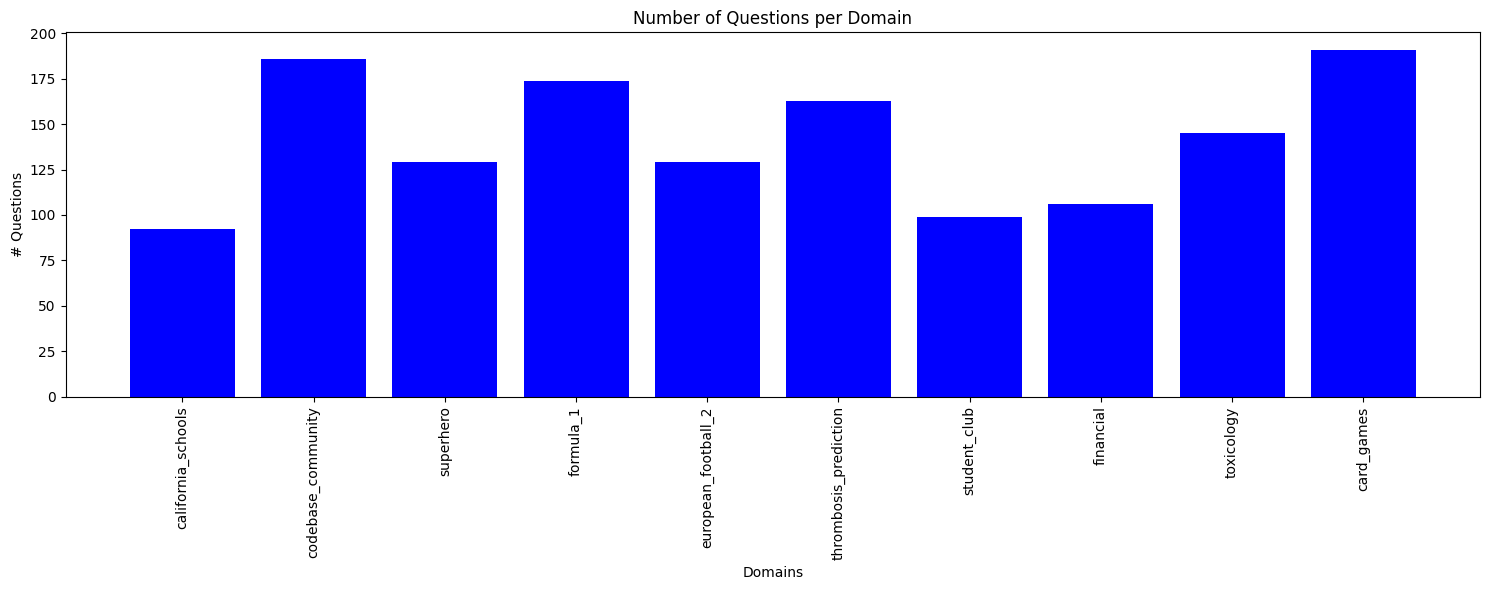

In [43]:
import matplotlib.pyplot as plt

# Creating a bar plot
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
plt.bar(total_questions_per_domain.keys(), total_questions_per_domain.values(), color='blue')
plt.xlabel('Domains')
plt.ylabel('# Questions')
plt.title('Number of Questions per Domain')
plt.xticks(rotation=90)  # Rotate the domain names for better readability
plt.tight_layout()  # Adjust layout to fit everything nicely

plt.show()

In [17]:
import sqlite3
import os
import logging
from collections import Counter
import json

def load_json(path):
   with open(path, 'r') as j:
      data = json.loads(j.read())
   return data

class Dataset:
   """
   A class to load and manage text-to-SQL datasets.
   """

   BASE_DB_PATH = None
   DATA_PATH = None
   CONFIG_PATH = os.path.abspath(os.path.join(os.getcwd(), '..', 'config/dataset_config.yaml'))

   def __init__(self):
      self.conn = None
      self.cursor = None
      self.data = []
      self.total_predicted_execution_time = 0
      self.total_gold_execution_time = 0
      self.last_predicted_execution_time = 0
      self.last_gold_execution_time = 0

      self.current_db = ""
      self.current_database_schema = ""
      self.config = None

      self.load_config()
      self.load_data()
      

   def load_data(self):
      """
      Load questions from the predefined DATA_PATH.

      Raises:
         DataLoaderError: If DATA_PATH is not defined.
      """
      if self.DATA_PATH is None:
         raise ValueError("DATA_PATH must be defined in child classes")

      data = load_json(self.DATA_PATH)      

      self.data = data


   def load_config(self):      
      self.config = None

   
   def get_number_of_data_points(self):
      """
      Return the total number of questions available.
      
      Returns:
         int: The total number of questions.
      """
      return len(self.data)
   

   def get_data_point(self, index: int) -> dict:      
      """
      Retrieve a data point based on the provided index.

      Parameters:
         index (int): The index of the desired data point.

      Returns:
         dict: The retrieved data point.
      """
         
      return self.data[index]

   
   # def execute_queries_and_match_data(self, sql: str, gold_sql: str, db_name: str) -> int:
   #    """
   #    Execute provided SQL queries and compare the results.

   #    Parameters:
   #       sql (str): The predicted SQL query to execute.
   #       gold_sql (str): The golden SQL query to compare results.
   #       db_name (str): The database name on which the queries will be executed.

   #    Returns:
   #       int: 1 if the results match, otherwise 0.
   #    """

   #    if self.current_db != db_name:
   #       self.load_db(db_name)
      
   #    try:         
   #       self.cursor.execute(sql)
   #       pred_res = self.cursor.fetchall()
         
         

   #       self.last_predicted_execution_time = t.elapsed_time
   #       self.total_predicted_execution_time += t.elapsed_time               

   #    except sqlite3.Error as err:
   #       logging.error("DataLoader.execute_queries_and_match_data() " + str(err))
   #       return 0

   #    with Timer() as t:
   #       self.cursor.execute(gold_sql)
   #       golden_res = self.cursor.fetchall()

   #    if t.elapsed_time > 5:
   #       logging.info(f"Golden query execution time: {t.elapsed_time:.2f} \nSQL Query:\n" + gold_sql)
   #    else:
   #       logging.info(f"Golden query execution time: {t.elapsed_time:.2f}")
      
   #    self.last_gold_execution_time = t.elapsed_time
   #    self.total_gold_execution_time += t.elapsed_time      

   #    # logging.debug("Predicted data:")
   #    # logging.debug(set(pred_res))
   #    # logging.debug("Gold data:")
   #    # logging.debug(set(golden_res))

   #    equal = (Counter(pred_res) == Counter(golden_res))
   #    return int(equal)
   

   def execute_query(self, sql: str, db_name: str) -> int:
      """
      Execute a SQL query on a specified database and log execution time.

      Parameters:
         sql (str): The SQL query to execute.
         db_name (str): The database name on which the query will be executed.

      Returns:
         int: 1 if the query executes successfully, otherwise 0.
      """
      
      if self.current_db != db_name:
         self.load_db(db_name)
      
      try:
         with Timer() as t:
            self.cursor.execute(sql)
            pred_res = self.cursor.fetchall()
         
         if t.elapsed_time > 5:
            logging.info(f"Query execution time: {t.elapsed_time:.2f} \nSQL Query:\n" + pred_res)
         else:
            logging.info(f"Query query execution time: {t.elapsed_time:.2f}")

      except sqlite3.Error as err:
         logging.error("DataLoader.execute_query() " + str(err))
         return 0

      return 1


   def list_tables_and_columns(self, db_name: str) -> str:
      """
      List tables and columns of a specified database, logging the info.

      Parameters:
         db_name (str): The database name to list tables and columns.

      Returns:
         str: The formatted string of tables and columns information.
      """
   
      if self.current_db != db_name:
         self.load_db(db_name)

      self.cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
      tables = self.cursor.fetchall()

      res = ""
      for table in tables:
         table_name = table[0]
         res = res + f"Table: {table_name}\n"
         
         self.cursor.execute(f"PRAGMA table_info(\"{table_name}\");")
         columns = self.cursor.fetchall()
         for column in columns:
            col_name = column[1]
            col_type = column[2]
            res = res + f"  Column: {col_name}, Type: {col_type}\n"         

      logging.info(res)
      return res              


   def get_create_statements(self, db_name: str) -> str:
      """
      Retrieve and store SQL CREATE statements for all tables in a database.

      Parameters:
         db_name (str): The name of the database to get CREATE statements.

      Returns:
         str: The SQL CREATE statements for all tables in the database.
      """
      if self.current_db != db_name:
         self.load_db(db_name)

         self.cursor.execute("SELECT sql FROM sqlite_master WHERE type='table';")
         create_statements = self.cursor.fetchall()

         self.current_database_schema = '\n'.join([statement[0] for statement in create_statements])
      
      return self.current_database_schema
   

   def get_schema_and_sample_data(self, db_name: str) -> str:
      """
      Retrieve, store, and return the schema and sample data from a database.

      Parameters:
         db_name (str): The name of the database to get schema and data.

      Returns:
         str: A formatted string containing schema and sample data.
      """
       
      if self.current_db != db_name:
         self.load_db(db_name)      
      
         self.cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
         tables = self.cursor.fetchall()
         
         schema_and_sample_data = ""

         for table in tables:
            table = table[0]  
            self.cursor.execute(f"SELECT sql FROM sqlite_master WHERE type='table' AND name='{table}';")
            create_statement = self.cursor.fetchone()[0]
            
            schema_and_sample_data += f"{create_statement};\n\n"
            
            self.cursor.execute(f"SELECT * FROM \"{table}\" LIMIT 3;")
            rows = self.cursor.fetchall()
                     
            self.cursor.execute(f"PRAGMA table_info(\"{table}\");")
            columns = self.cursor.fetchall()
            column_names = [column[1] for column in columns]
            column_names_line = "\t".join(column_names)
            
            # schema_and_sample_data += f"Three rows from {table} table:\n"
            # schema_and_sample_data += f"{column_names_line}\n"

            # for row in rows:
            #       row_line = "\t".join([str(value) for value in row])
            #       schema_and_sample_data += f"{row_line}\n"

            schema_and_sample_data += "\n"

         schema_and_sample_data += "\n"

         self.current_database_schema = schema_and_sample_data
    
      return self.current_database_schema


   def load_db(self, db_name: str) -> None:
      """
      Load a database into the class by connecting and setting a cursor.

      Parameters:
         db_name (str): The name of the database to load.
      """
      db_path = self.get_db_path(db_name)
      logging.debug("DB_path: " + db_path)
      self.conn = sqlite3.connect(db_path)      
      self.cursor = self.conn.cursor()
      self.current_db = db_name


   def get_db_path(self, db_name: str) -> str:
      """
      Construct and return the path to a specified database file.

      Parameters:
         db_name (str): The name of the database to find the path.

      Returns:
         str: The constructed path to the database file.

      Raises:
         ValueError: If BASE_PATH is not defined.
      """
   
      if self.BASE_DB_PATH is None:
         raise ValueError("BASE_PATH must be defined in child classes")
      return f"{self.BASE_DB_PATH}/{db_name}/{db_name}.sqlite"
   

   def get_data_path(self) -> str:
      """
      Abstract method to get the path for the data file.

      This method should be implemented in child classes.

      Raises:
         NotImplementedError: If the method is not implemented in a child class.
      """
      
      raise NotImplementedError("get_data_path() must be defined in child classes")
   

class BIRDDataset(Dataset):
   """
   Dataset class for the BIRD dataset.
   """

   DEV_DB_PATH = os.path.abspath(
      os.path.join(os.getcwd(), '..', 'data/BIRD/dev/dev_databases/'))
   
   TRAIN_DB_PATH = os.path.abspath(
      os.path.join(os.getcwd(), '..', 'data/BIRD/train/train_databases/'))

   TRAIN_DATA_PATH = os.path.abspath(
    os.path.join(os.getcwd(), '..', 'data/BIRD/train/train.json'))

   DEV_DATA_PATH = os.path.abspath(
    os.path.join(os.getcwd(), '..', 'data/BIRD/dev/dev.json'))
   
   def __init__(self):
      super().__init__()

      self.load_database_names()


   def load_data(self) -> None:
      """
      Load and filter questions specific to the BIRD dataset configurations.
      """

      if self.TRAIN_DATA_PATH is None or self.DEV_DATA_PATH is None:
         raise ValueError("QUESTIONS_PATH must be defined in child classes")

      self.data = load_json(self.DEV_DATA_PATH)


   def load_database_names(self):
      self.dev_databases = os.listdir(self.DEV_DB_PATH)
      self.train_databases = os.listdir(self.TRAIN_DB_PATH)

   
   def load_db(self, db_name: str) -> None:
      """
      Load a database into the class by connecting and setting a cursor.

      Parameters:
         db_name (str): The name of the database to load.
      """
      db_path = ""
      if db_name in self.dev_databases:
         db_path = f"{self.DEV_DB_PATH}/{db_name}/{db_name}.sqlite"
      else:
         db_path = f"{self.TRAIN_DB_PATH}/{db_name}/{db_name}.sqlite"
         
      self.conn = sqlite3.connect(db_path)      
      self.cursor = self.conn.cursor()
      self.current_db = db_name
   

   def get_bird_table_info(self, db_name):
      """
      Given a database name, retrieve the table schema and information 
      from the corresponding bird-bench .csv files.

      :param database_name: str, name of the database
      :return: dict, where keys are table names and values are a string
      containing the table information
      """

      description_folder_path = ""
      if db_name in self.dev_databases:
         description_folder_path = self.DEV_DB_PATH + f"/{db_name}/database_description"
      else:
         description_folder_path = self.TRAIN_DB_PATH + f"/{db_name}/database_description"
      
      if not os.path.exists(description_folder_path):
         raise FileNotFoundError(f"No such file or directory: '{description_folder_path}'")
      
      table_info = ""
      
      for filename in os.listdir(description_folder_path):
         if filename.endswith(".csv"):
            table_name = filename.rstrip(".csv")
            csv_path = os.path.join(description_folder_path, filename)
            
            with open(csv_path, mode='r', encoding='utf-8') as file:
               file_contents = file.read()                                   
            
            table_info += "Table " + table_name + "\n"
            table_info += file_contents
      
      return table_info
   

   def get_bird_db_info(self, db_path):      
      table_info = self.get_bird_table_info(db_path)

      db_info = ""
      for table in table_info:
         db_info += table_info[table]
         db_info += "\n\n"
      
      return db_info



dataset = BIRDDataset()

no_data_points = dataset.get_number_of_data_points()

difficulties_per_domain = {}
for i in range(no_data_points):
   data_point = dataset.get_data_point(i)
   evidence = data_point['evidence']
   golden_sql = data_point['SQL']
   db_id = data_point['db_id']            
   question = data_point['question']
   difficulty = data_point['difficulty'] if 'difficulty' in data_point else ""

   if not db_id in difficulties_per_domain: 
      difficulties_per_domain[db_id] = { difficulty : 1 }
   else:
      if not difficulty in difficulties_per_domain[db_id]:
         difficulties_per_domain[db_id][difficulty] = 1
      else:
         difficulties_per_domain[db_id][difficulty] += 1


print(difficulties_per_domain)



{'california_schools': {'simple': 54, 'moderate': 30, 'challenging': 5}, 'financial': {'moderate': 37, 'simple': 63, 'challenging': 6}, 'toxicology': {'simple': 76, 'moderate': 38, 'challenging': 31}, 'card_games': {'simple': 125, 'moderate': 53, 'challenging': 13}, 'codebase_community': {'simple': 151, 'moderate': 30, 'challenging': 5}, 'superhero': {'simple': 81, 'moderate': 33, 'challenging': 15}, 'formula_1': {'moderate': 43, 'simple': 117, 'challenging': 14}, 'european_football_2': {'simple': 65, 'moderate': 50, 'challenging': 14}, 'thrombosis_prediction': {'moderate': 86, 'simple': 49, 'challenging': 28}, 'student_club': {'simple': 101, 'moderate': 48, 'challenging': 9}, 'debit_card_specializing': {'simple': 43, 'moderate': 17, 'challenging': 4}}


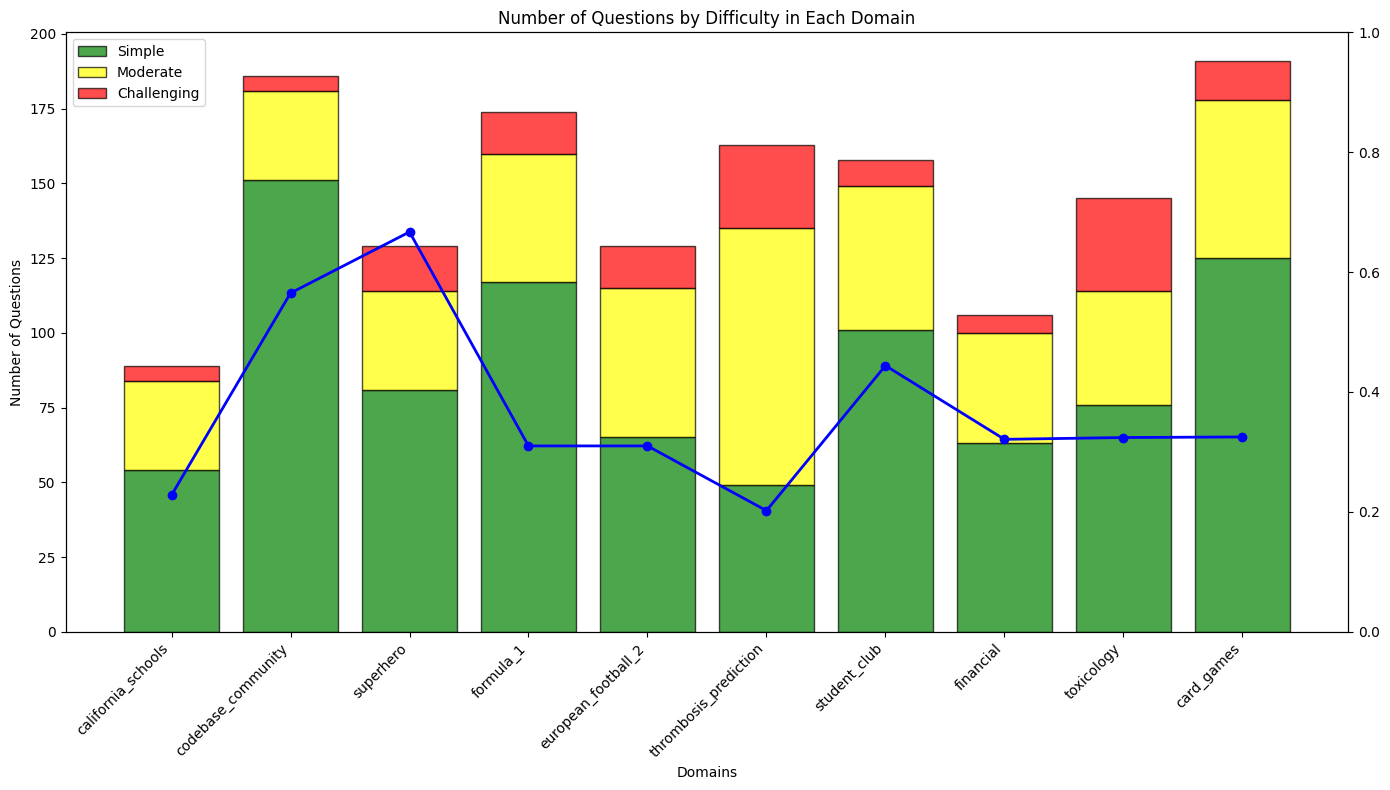

In [99]:
import matplotlib.pyplot as plt

# Data for plotting
data = {
    'california_schools': {'simple': 54, 'moderate': 30, 'challenging': 5},
    'codebase_community': {'simple': 151, 'moderate': 30, 'challenging': 5},
    'superhero': {'simple': 81, 'moderate': 33, 'challenging': 15},
    'formula_1': {'moderate': 43, 'simple': 117, 'challenging': 14},
    'european_football_2': {'simple': 65, 'moderate': 50, 'challenging': 14},
    'thrombosis_prediction': {'moderate': 86, 'simple': 49, 'challenging': 28},
    'student_club': {'simple': 101, 'moderate': 48, 'challenging': 9},    
    'financial': {'moderate': 37, 'simple': 63, 'challenging': 6},
    'toxicology': {'simple': 76, 'moderate': 38, 'challenging': 31},
    'card_games': {'simple': 125, 'moderate': 53, 'challenging': 13},
}
Accuracy = [0.228, 0.565, 0.667, 0.310, 0.310, 0.202, 0.444, 0.321, 0.324, 0.325]

domains = list(data.keys())
simple = [data[domain]['simple'] for domain in domains]
moderate = [data[domain]['moderate'] for domain in domains]
challenging = [data[domain]['challenging'] for domain in domains]

# Create a bar plot
fig, ax = plt.subplots(figsize=(14, 8))

# Position of bars on x-axis
ind = range(len(domains))

ax2 = ax.twinx()
ax2.plot(ind, Accuracy, color='blue', marker='o', linestyle='-', linewidth=2)
ax2.set_ylim(0, 1)

# Make the plot
p1 = ax.bar(ind, simple, color='green', edgecolor='black', alpha=0.7)
p2 = ax.bar(ind, moderate, bottom=simple, color='yellow', edgecolor='black', alpha=0.7)
p3 = ax.bar(ind, challenging, bottom=[i+j for i,j in zip(simple, moderate)], color='red', edgecolor='black', alpha=0.7)

# Adding labels
ax.set_xlabel('Domains')
ax.set_ylabel('Number of Questions')
ax.set_title('Number of Questions by Difficulty in Each Domain')
ax.set_xticks(ind)
ax.set_xticklabels(domains, rotation=45, ha="right")
ax.legend((p1[0], p2[0], p3[0]), ('Simple', 'Moderate', 'Challenging'))

# Show the plot
plt.tight_layout()
plt.show()


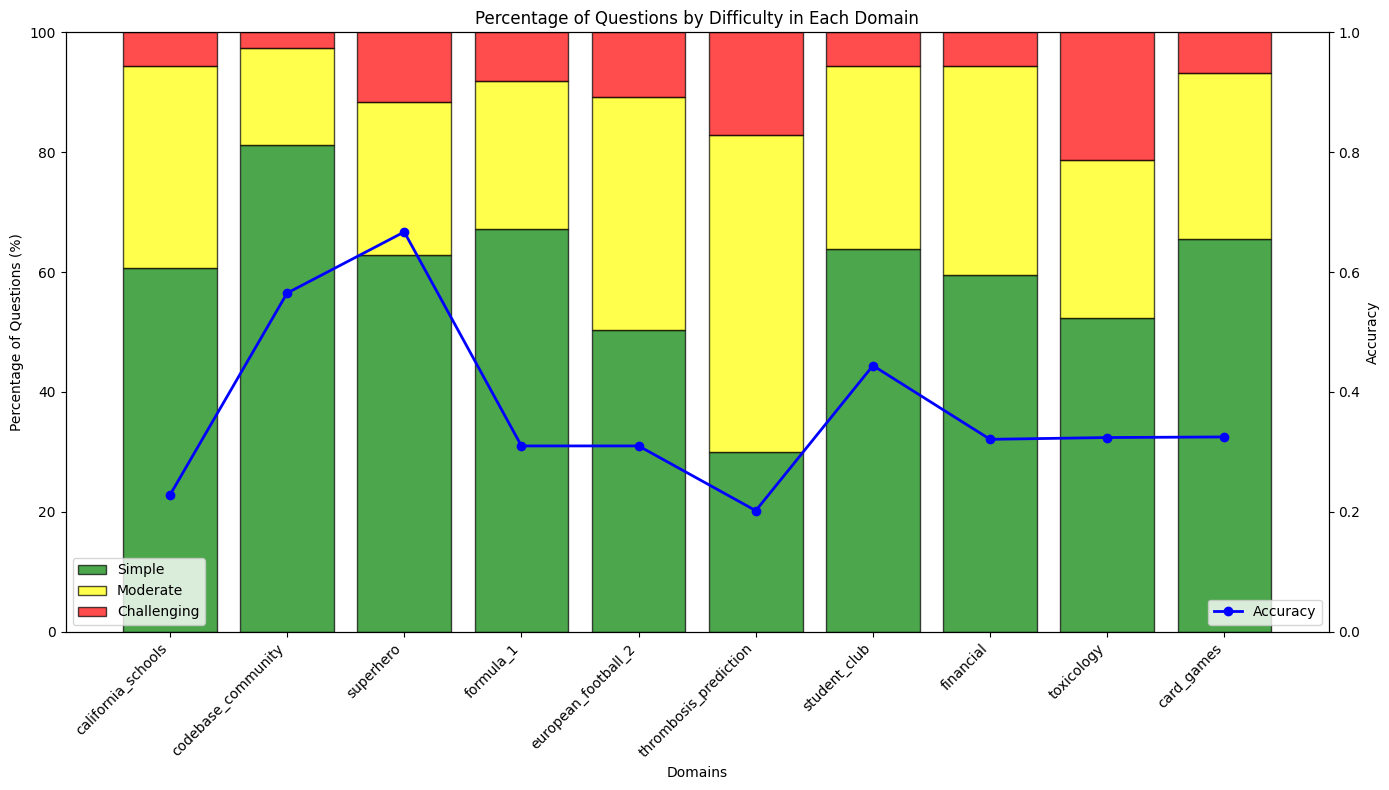

In [100]:
import numpy as np

# Calculating the proportions of each difficulty level as a percentage of the total in each domain
data = {
    'california_schools': {'simple': 54, 'moderate': 30, 'challenging': 5},
    'codebase_community': {'simple': 151, 'moderate': 30, 'challenging': 5},
    'superhero': {'simple': 81, 'moderate': 33, 'challenging': 15},
    'formula_1': {'moderate': 43, 'simple': 117, 'challenging': 14},
    'european_football_2': {'simple': 65, 'moderate': 50, 'challenging': 14},
    'thrombosis_prediction': {'moderate': 86, 'simple': 49, 'challenging': 28},
    'student_club': {'simple': 101, 'moderate': 48, 'challenging': 9},    
    'financial': {'moderate': 37, 'simple': 63, 'challenging': 6},
    'toxicology': {'simple': 76, 'moderate': 38, 'challenging': 31},
    'card_games': {'simple': 125, 'moderate': 53, 'challenging': 13},
}
Accuracy = [0.228, 0.565, 0.667, 0.310, 0.310, 0.202, 0.444, 0.321, 0.324, 0.325]

domains = list(data.keys())

# Function to calculate percentages
def calculate_percentages(difficulties):
    total = sum(difficulties.values())
    return {key: (value / total) * 100 for key, value in difficulties.items()}

# Apply the function to each domain
percentage_data = {domain: calculate_percentages(difficulties) for domain, difficulties in data.items()}

# Extracting the percentages for each difficulty level
simple_percent = [percentage_data[domain]['simple'] for domain in domains]
moderate_percent = [percentage_data[domain]['moderate'] for domain in domains]
challenging_percent = [percentage_data[domain].get('challenging', 0) for domain in domains]  # Adding 0 for domains without 'challenging'

# Create a new plot
fig, ax = plt.subplots(figsize=(14, 8))

ax2 = ax.twinx()
ax2.plot(ind, Accuracy, color='blue', marker='o', linestyle='-', linewidth=2, label="Accuracy")
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0, 1)  # Accuracy ranges from 0 to 1
ax2.legend(loc='lower right')

# ax2 = ax1.twinx()
# df.plot(kind='line', x='Database', y='Accuracy', ax=ax2, color='k', marker='o', linewidth=2, label='Accuracy')
# ax2.set_ylabel('Accuracy')
# ax2.set_ylim(0, 1)  # Accuracy ranges from 0 to 1
# ax2.legend(loc='upper right')

# Make the plot with percentages
p1 = ax.bar(ind, simple_percent, color='green', edgecolor='black', alpha=0.7)
p2 = ax.bar(ind, moderate_percent, bottom=simple_percent, color='yellow', edgecolor='black', alpha=0.7)
p3 = ax.bar(ind, challenging_percent, bottom=np.array(simple_percent) + np.array(moderate_percent), color='red', edgecolor='black', alpha=0.7)

# Adding labels
ax.set_xlabel('Domains')
ax.set_ylabel('Percentage of Questions (%)')
ax.set_title('Percentage of Questions by Difficulty in Each Domain')
ax.set_xticks(ind)
ax.set_xticklabels(domains, rotation=45, ha="right")
ax.legend((p1[0], p2[0], p3[0]), ('Simple', 'Moderate', 'Challenging'))

# Set y-axis to 100%
ax.set_ylim(0, 100)

# Show the plot
plt.tight_layout()
plt.show()


In [37]:
for key in total_questions_per_domain:
    print(key + ": " + str(total_questions_per_domain[key]))

california_schools: 92
codebase_community: 186
superhero: 129
formula_1: 174
european_football_2: 129
thrombosis_prediction: 163
student_club: 99
financial: 106
toxicology: 145
card_games: 191


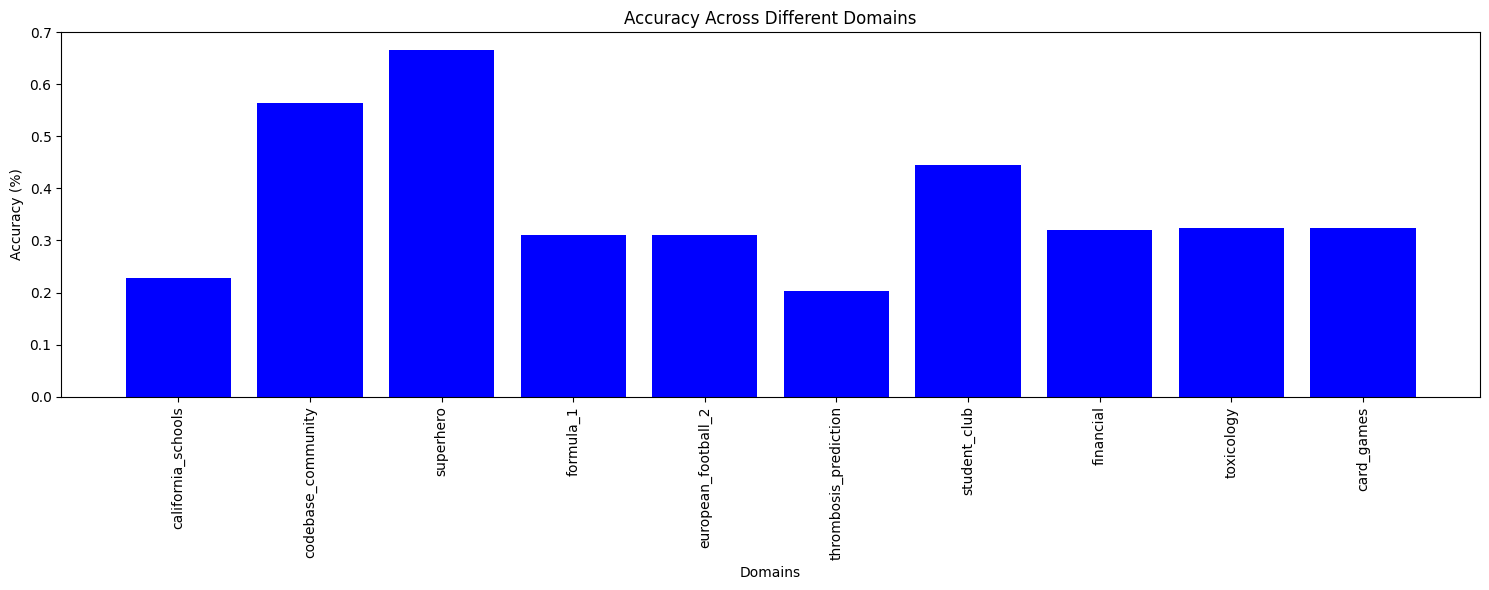

In [35]:
import matplotlib.pyplot as plt


accuracies = [x/y for x,y in zip(total_successes_per_domain.values(), total_questions_per_domain.values())]

# Creating a bar plot
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
plt.bar(total_questions_per_domain.keys(), accuracies, color='blue')
plt.xlabel('Domains')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Across Different Domains')
plt.xticks(rotation=90)  # Rotate the domain names for better readability
plt.tight_layout()  # Adjust layout to fit everything nicely

plt.show()

In [46]:
domain_accuracies = zip(total_questions_per_domain.keys(), accuracies)

for key in domain_accuracies:    
    print(key[0] + ": " + str(key[1]))

california_schools: 0.22826086956521738
codebase_community: 0.5645161290322581
superhero: 0.6666666666666666
formula_1: 0.3103448275862069
european_football_2: 0.31007751937984496
thrombosis_prediction: 0.20245398773006135
student_club: 0.4444444444444444
financial: 0.32075471698113206
toxicology: 0.32413793103448274
card_games: 0.32460732984293195


In [58]:
domain_accuracies = zip(total_questions_per_domain.keys(), accuracies)
total_acc = 0
for domain in domain_accuracies:
    total_acc += domain[1]


print("Mean accuracy: " + str(total_acc / len(total_questions_per_domain.values())))
print("Finance domain: 0.32075471698113206")

Mean accuracy: 0.3696264422263247
Finance domain: 0.32075471698113206


In [13]:
# Dev DB path
DEV_DB_PATH = os.path.abspath(
      os.path.join(os.getcwd(), '..', 'data/BIRD/dev/dev_databases/'))

# Function to get the schema of a database
databases = ["california_schools", "codebase_community", "superhero", "formula_1", "european_football_2", "thrombosis_prediction", "student_club", "financial", "toxicology", "card_games"]

# Function to get the schema and statistics of a database
def get_db_stats(db_file):
    db_path = os.path.join(DEV_DB_PATH, db_file, db_file + ".sqlite")
    
    with sqlite3.connect(db_path) as conn:
        cursor = conn.cursor()

        # Get all tables
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()
        
        # Dictionary to store stats
        stats = {'tables': len(tables), 'total_columns': 0, 'columns_per_table': {}}

        for table in tables:
            table_name = table[0]
            cursor.execute(f"PRAGMA table_info(\"{table_name}\");")
            columns = cursor.fetchall()

            # Update stats
            num_columns = len(columns)            
            
            stats['total_columns'] += num_columns
            stats['columns_per_table'][table_name] = num_columns

        return stats

# Analyzing each database and storing statistics
db_stats = {}
for db in databases:
    stats = get_db_stats(db)
    db_stats[db] = stats

# Print the statistics for each database
for db, stats in db_stats.items():
    print(f"Database: {db}")
    print(f"  Number of Tables: {stats['tables']}")
    print(f"  Total Number of Columns: {stats['total_columns']}")
    for table, num_columns in stats['columns_per_table'].items():
        print(f"  Table '{table}' has {num_columns} columns")
    print("\n")


Database: california_schools
  Number of Tables: 3
  Total Number of Columns: 89
  Table 'frpm' has 29 columns
  Table 'satscores' has 11 columns
  Table 'schools' has 49 columns


Database: codebase_community
  Number of Tables: 8
  Total Number of Columns: 71
  Table 'badges' has 4 columns
  Table 'comments' has 7 columns
  Table 'postHistory' has 9 columns
  Table 'postLinks' has 5 columns
  Table 'posts' has 21 columns
  Table 'tags' has 5 columns
  Table 'users' has 14 columns
  Table 'votes' has 6 columns


Database: superhero
  Number of Tables: 10
  Total Number of Columns: 31
  Table 'alignment' has 2 columns
  Table 'attribute' has 2 columns
  Table 'colour' has 2 columns
  Table 'gender' has 2 columns
  Table 'publisher' has 2 columns
  Table 'race' has 2 columns
  Table 'superhero' has 12 columns
  Table 'hero_attribute' has 3 columns
  Table 'superpower' has 2 columns
  Table 'hero_power' has 2 columns


Database: formula_1
  Number of Tables: 14
  Total Number of Columns:

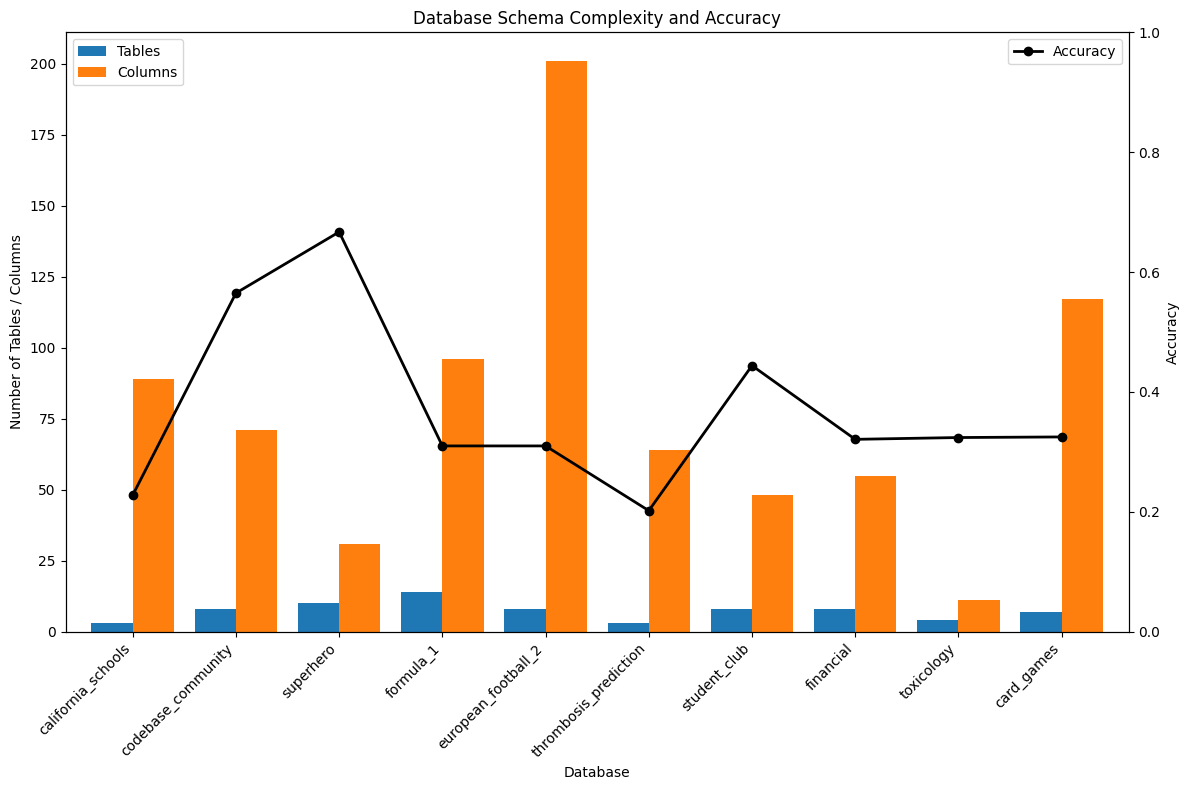

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Database information
data = {
    "Database": ["california_schools", "codebase_community", "superhero", "formula_1", 
                 "european_football_2", "thrombosis_prediction", "student_club", 
                 "financial", "toxicology", "card_games"],
    "Tables": [3, 8, 10, 14, 8, 3, 8, 8, 4, 7],
    "Columns": [89, 71, 31, 96, 201, 64, 48, 55, 11, 117],
    "Accuracy": [0.228, 0.565, 0.667, 0.310, 0.310, 0.202, 0.444, 0.321, 0.324, 0.325]
}

df = pd.DataFrame(data)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 8))

colors = ['blue' if db != 'financial' else 'red' for db in df['Database']]

# Bar plot for Tables and Columns
df.plot(kind='bar', x='Database', y=['Tables', 'Columns'], ax=ax1, width=0.8)
ax1.set_ylabel('Number of Tables / Columns')

# Line plot for Accuracy
ax2 = ax1.twinx()
df.plot(kind='line', x='Database', y='Accuracy', ax=ax2, color='k', marker='o', linewidth=2, label='Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0, 1)  # Accuracy ranges from 0 to 1

# Titles and labels
plt.title('Database Schema Complexity and Accuracy')
ax1.set_xlabel('Database')
ax1.set_xticklabels(df['Database'], rotation=45, ha='right')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


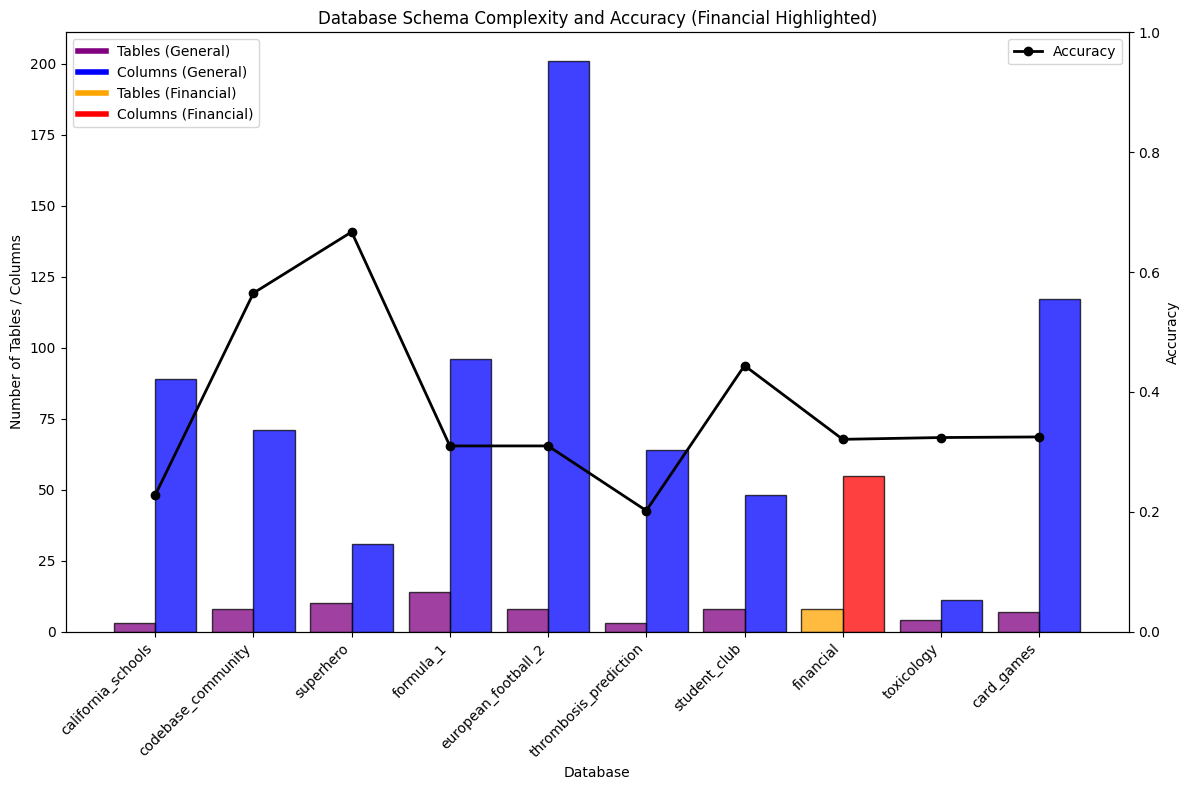

In [103]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np

# Database information
data = {
    "Database": ["california_schools", "codebase_community", "superhero", "formula_1", 
                 "european_football_2", "thrombosis_prediction", "student_club", 
                 "financial", "toxicology", "card_games"],
    "Tables": [3, 8, 10, 14, 8, 3, 8, 8, 4, 7],
    "Columns": [89, 71, 31, 96, 201, 64, 48, 55, 11, 117],
    "Accuracy": [0.228, 0.565, 0.667, 0.310, 0.310, 0.202, 0.444, 0.321, 0.324, 0.325]
}

df = pd.DataFrame(data)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 8))

# Number of databases
n_databases = len(df['Database'])

# Generate bar positions
bar_width = 0.42
index = np.arange(n_databases)

# Colors for Tables and Columns bars
table_colors = ['purple' if db != 'financial' else 'orange' for db in df['Database']]
column_colors = ['blue' if db != 'financial' else 'red' for db in df['Database']]

# Bar plot for Tables and Columns
tables_bars = ax1.bar(index - bar_width/2, df['Tables'], bar_width, label='Tables', color=table_colors, edgecolor='black', alpha=0.75)
columns_bars = ax1.bar(index + bar_width/2, df['Columns'], bar_width, label='Columns', color=column_colors, edgecolor='black', alpha=0.75)

ax1.set_ylabel('Number of Tables / Columns')
ax1.set_xticks(index)
ax1.set_xticklabels(df['Database'])
ax1.legend(loc='upper left')

# Line plot for Accuracy
ax2 = ax1.twinx()
df.plot(kind='line', x='Database', y='Accuracy', ax=ax2, color='k', marker='o', linewidth=2, label='Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0, 1)  # Accuracy ranges from 0 to 1
ax2.legend(loc='upper right')

# Titles and labels
plt.title('Database Schema Complexity and Accuracy (Financial Highlighted)')
ax1.set_xlabel('Database')
ax1.set_xticklabels(df['Database'], rotation=45, ha='right')

# Custom legend entries
legend_elements = [Line2D([0], [0], color='purple', lw=4, label='Tables (General)'),
                   Line2D([0], [0], color='blue', lw=4, label='Columns (General)'),
                   Line2D([0], [0], color='orange', lw=4, label='Tables (Financial)'),
                   Line2D([0], [0], color='red', lw=4, label='Columns (Financial)')]
ax1.legend(handles=legend_elements, loc='upper left')


# Show plot
plt.tight_layout()
plt.show()


### Classifying the questions into 2 different categories 

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
# To create a plot that matches the provided images, including the colored legend, we will follow the provided code.

import matplotlib.pyplot as plt

# Metrics provided by the user
accuracy = [0.5377, 0.6571, 0.8019]
precision = [0.4167, 0.5172, 0.75]
recall = [0.8108, 0.4054, 0.6486]
f1_score = [0.5505, 0.4545, 0.6957]

# Use the colormap for the color scheme
cmap = plt.cm.YlOrRd

# Labels for the legend
labels = ['GPT-3.5-Turbo with Good Examples', 'GPT-3.5-Turbo with Bad Examples', 'GPT-4 with Bad Examples']

# Define colors from the colormap
light_yellow = cmap(0.1)  # Light yellow from the lower end
orange_color = cmap(0.5)  # Mid-range color
deep_red = cmap(0.9)  # Deep red from the higher end

# Function to add annotations inside the bars
def add_value_labels(ax, data):
    for i, v in enumerate(data):
        # Position the text inside the bar if the value is high enough
        # otherwise, position the text above the bar
        if v > 0.1:  # threshold chosen to fit the text inside the bars
            ax.text(i, v / 2, f"{v:.2f}", ha='center', va='center', color='black')
        else:
            ax.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', color='black')

# Create the subplot figure
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot each metric with adjusted annotations
for i, (ax, metric, title) in enumerate(zip(axs.flatten(), [accuracy, precision, recall, f1_score], ['Accuracy', 'Precision', 'Recall', 'F1-Score'])):
    bars = ax.bar(range(len(metric)), metric, color=[light_yellow, orange_color, deep_red], edgecolor='black')
    ax.set_title(title)
    add_value_labels(ax, metric)
    ax.set_xticks([])  # Remove the x-axis ticks

# Adjust the legend to match the second image provided by the user
# Custom legend with colored labels
custom_lines = [plt.Line2D([0], [0], color=light_yellow, lw=4),
                plt.Line2D([0], [0], color=orange_color, lw=4),
                plt.Line2D([0], [0], color=deep_red, lw=4)]

# Position the legend at the bottom of the plot as in the second image
fig.legend(custom_lines, labels, loc='lower center', bbox_to_anchor=(0.5, 0.06), ncol=3)

# Adjust the layout to accommodate the legend and prevent label cut-off
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

# Show the plot
plt.show()


### Classifying the questions into 4 different categories 

#### GPT-3.5-turbo results

In [16]:
confusion_matrix_list = [
    [55., 5., 3., 0.],
    [19., 7., 3., 0.],
    [4., 0., 1., 0.],
    [6., 4., 2., 0.]
]

# Convert to a NumPy array
confusion_matrix = np.array(confusion_matrix_list).astype(int)

labels = [0, 1, 2, 3] 

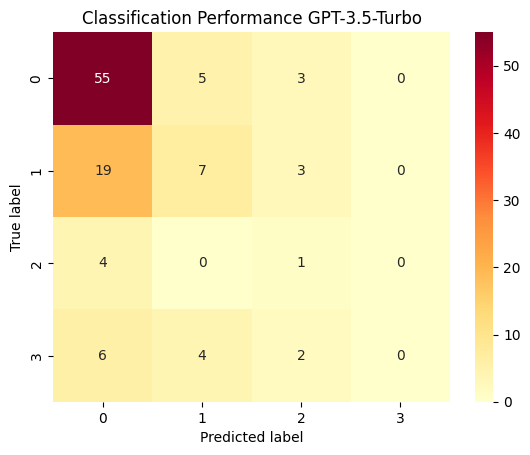

In [17]:

# sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="YlOrRd", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Classification Performance GPT-3.5-Turbo')
plt.show()

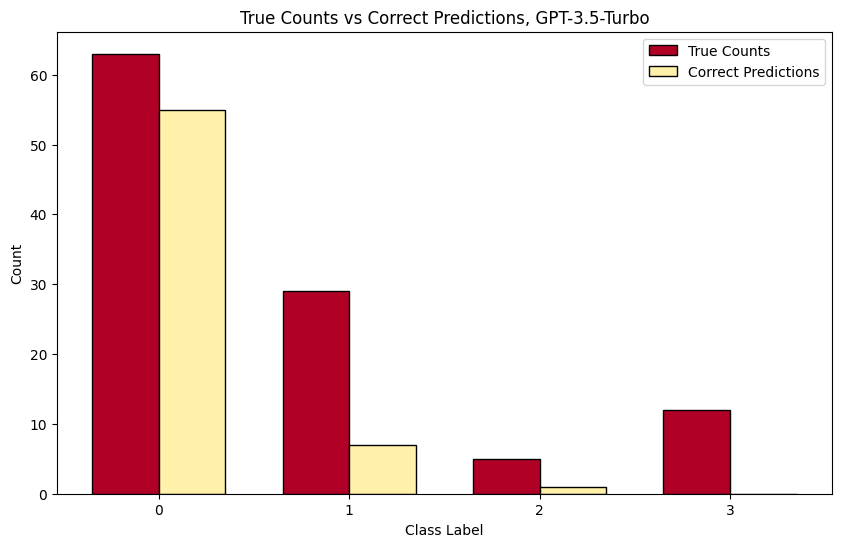

In [41]:
annotation_counts =  {0: 63, 1: 29, 2: 5, 3: 12}
annotation_counts_list =list(annotation_counts.values())

# Create a new matrix for comparison
comparison_matrix = np.vstack((annotation_counts_list, np.diag(confusion_matrix)))

# Define the labels for the heatmap
categories = ['True Counts', 'Correct Predictions']

# For the bar chart, we will plot the same data
plt.figure(figsize=(10, 6))
# Setting the positions and width for the bars
positions = np.arange(len(labels))
width = 0.35

cmap = plt.cm.YlOrRd
light_yellow = cmap(0.1)  # Light yellow from the lower end
deep_red = cmap(0.9)  # Deep red from the higher end

# Plotting the bars for true counts and correct predictions
plt.bar(positions - width/2, annotation_counts_list, width=width, label='True Counts', color=deep_red, edgecolor='black')
plt.bar(positions + width/2, np.diag(confusion_matrix), width=width, label='Correct Predictions', color=light_yellow, edgecolor='black')

# Adding labels and title
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('True Counts vs Correct Predictions, GPT-3.5-Turbo')
plt.xticks(positions, labels)
plt.legend()

# Display the bar chart
plt.show()


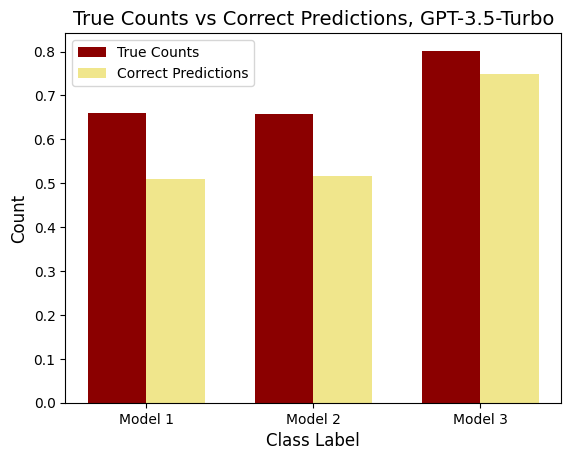

In [58]:
sample_data = {
    'True Counts': df['Accuracy'],
    'Correct Predictions': df['Precision']
}

# Create a DataFrame
sample_df = pd.DataFrame(sample_data)

# Define the color for the bars
colors = ['darkred', 'khaki']

# Plotting
fig, ax = plt.subplots()

# We create a bar plot for 'True Counts' and 'Correct Predictions' side by side
bar_width = 0.35
index = np.arange(len(sample_df))

bar1 = ax.bar(index, sample_df['True Counts'], bar_width, label='True Counts', color=colors[0])
bar2 = ax.bar(index + bar_width, sample_df['Correct Predictions'], bar_width, label='Correct Predictions', color=colors[1])

# Adding titles and labels
ax.set_xlabel('Class Label', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('True Counts vs Correct Predictions, GPT-3.5-Turbo', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Model 1', 'Model 2', 'Model 3'])
ax.legend()

# Save the plot to a file
# plt.savefig('/mnt/data/styled_performance_plots.png')

# Display the plot
plt.show()

#### GPT-4 results

In [37]:
confusion_matrix_2= [
    [62, 1, 0, 1],
    [26, 2, 0, 2],
    [5, 0, 0, 0],
    [10, 1, 0, 1]
]

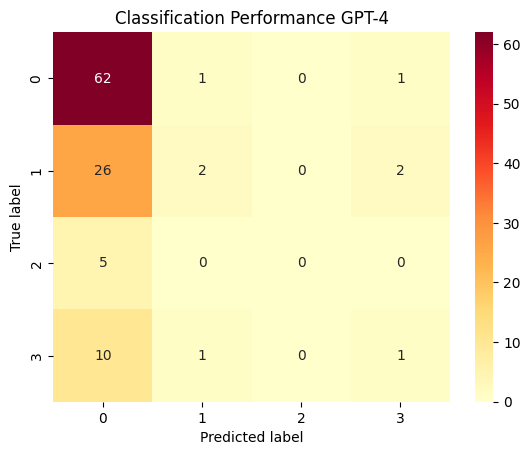

In [38]:
sns.heatmap(confusion_matrix_2, annot=True, fmt="d", cmap="YlOrRd", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Classification Performance GPT-4')
plt.show()

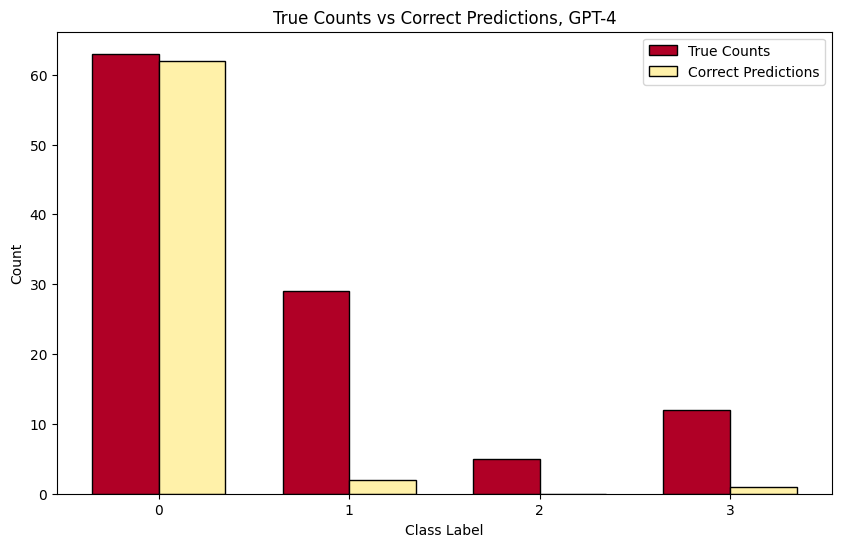

In [40]:
annotation_counts =  {0: 63, 1: 29, 2: 5, 3: 12}
annotation_counts_list =list(annotation_counts.values())

# Create a new matrix for comparison
comparison_matrix = np.vstack((annotation_counts_list, np.diag(confusion_matrix_2)))

# Define the labels for the heatmap
categories = ['True Counts', 'Correct Predictions']

# For the bar chart, we will plot the same data
plt.figure(figsize=(10, 6))
# Setting the positions and width for the bars
positions = np.arange(len(labels))
width = 0.35

cmap = plt.cm.YlOrRd
light_yellow = cmap(0.1)  # Light yellow from the lower end
deep_red = cmap(0.9)  # Deep red from the higher end

# Plotting the bars for true counts and correct predictions
plt.bar(positions - width/2, annotation_counts_list, width=width, label='True Counts', color=deep_red, edgecolor='black')
plt.bar(positions + width/2, np.diag(confusion_matrix_2), width=width, label='Correct Predictions', color=light_yellow, edgecolor='black')

# Adding labels and title
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('True Counts vs Correct Predictions, GPT-4')
plt.xticks(positions, labels)
plt.legend()

# Display the bar chart
plt.show()


### Weighted Averages

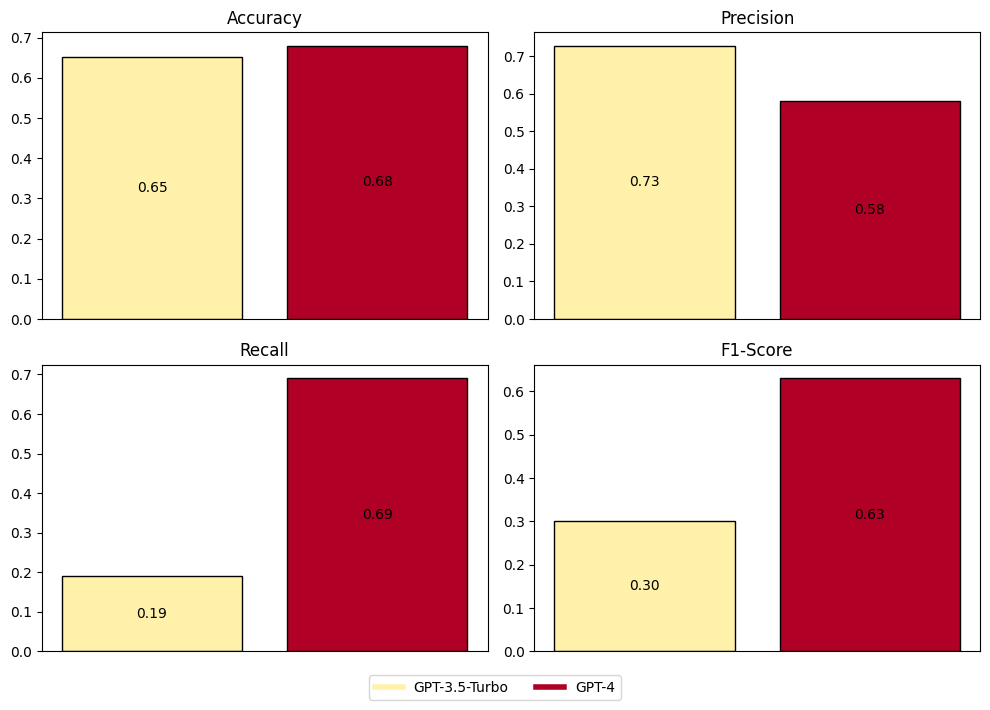

In [1]:
# To create a plot that matches the provided images, including the colored legend, we will follow the provided code.

import matplotlib.pyplot as plt

# Metrics provided by the user
accuracy = [0.6509, 0.6792]
precision = [0.727, 0.58]
recall = [0.190, 0.69]
f1_score = [0.3018, 0.63]

# Use the colormap for the color scheme
cmap = plt.cm.YlOrRd

# Labels for the legend
labels = ['GPT-3.5-Turbo' ,'GPT-4']

# Define colors from the colormap
light_yellow = cmap(0.1)  # Light yellow from the lower end
# orange_color = cmap(0.5)  # Mid-range color
deep_red = cmap(0.9)  # Deep red from the higher end

# Function to add annotations inside the bars
def add_value_labels(ax, data):
    for i, v in enumerate(data):
        # Position the text inside the bar if the value is high enough
        # otherwise, position the text above the bar
        if v > 0.1:  # threshold chosen to fit the text inside the bars
            ax.text(i, v / 2, f"{v:.2f}", ha='center', va='center', color='black')
        else:
            ax.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', color='black')

# Create the subplot figure
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot each metric with adjusted annotations
for i, (ax, metric, title) in enumerate(zip(axs.flatten(), [accuracy, precision, recall, f1_score], ['Accuracy', 'Precision', 'Recall', 'F1-Score'])):
    bars = ax.bar(range(len(metric)), metric, color=[light_yellow, deep_red], edgecolor='black')
    ax.set_title(title)
    add_value_labels(ax, metric)
    ax.set_xticks([])  # Remove the x-axis ticks

# Adjust the legend to match the second image provided by the user
# Custom legend with colored labels
custom_lines = [plt.Line2D([0], [0], color=light_yellow, lw=4),
                plt.Line2D([0], [0], color=deep_red, lw=4)]

# Position the legend at the bottom of the plot as in the second image
fig.legend(custom_lines, labels, loc='lower center', bbox_to_anchor=(0.5, 0.06), ncol=3)

# Adjust the layout to accommodate the legend and prevent label cut-off
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

# Show the plot
plt.show()


In [ ]:
import json
path = os.path.abspath(
      os.path.join(os.path.dirname( __file__ ), '..', 'data/BIRD/dev/financial_fixed.json'))

with open(path, 'r') as j:
      data = json.loads(j.read())


difficulties = {}
for data_point in data:
    if not data_point['difficulty'] in difficulties:
        difficulties[data_point['difficulty']] = 1
    elif data_point['difficulty'] in difficulties:
        difficulties[data_point['difficulty']] += 1